In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
train_data = pd.read_csv('archive/train.csv')
validation_data = pd.read_csv('archive/validation.csv')
test_data = pd.read_csv('archive/test.csv')

In [3]:
train_data.columns

Index(['Age', 'Grade', 'Gender', 'Race', 'SES_Quartile', 'ParentalEducation',
       'SchoolType', 'Locale', 'TestScore_Math', 'TestScore_Reading',
       'TestScore_Science', 'GPA', 'AttendanceRate', 'StudyHours',
       'InternetAccess', 'Extracurricular', 'PartTimeJob', 'ParentSupport',
       'Romantic', 'FreeTime', 'GoOut'],
      dtype='object')

In [4]:
train_data

,Age,Grade,Gender,Race,SES_Quartile,ParentalEducation,SchoolType,Locale,TestScore_Math,TestScore_Reading,...,GPA,AttendanceRate,StudyHours,InternetAccess,Extracurricular,PartTimeJob,ParentSupport,Romantic,FreeTime,GoOut
0,17,12,Female,White,3,HS,Public,Suburban,70.258235,79.665185,...,2.743879,0.906809,1.089243,1,1,0,0,0,2,2
1,18,12,Female,White,2,HS,Public,Suburban,67.876546,59.611505,...,2.587700,0.843739,0.879911,1,1,0,1,0,5,2
2,16,11,Female,White,2,HS,Public,City,62.070623,70.577443,...,2.426294,0.850923,1.003442,1,1,0,1,1,5,1
3,14,9,Female,White,4,Bachelors+,Public,Town,79.909312,82.924450,...,3.558240,0.946786,1.814810,1,1,0,1,0,4,2
4,16,11,Female,Two-or-more,4,SomeCollege,Public,Rural,90.562294,95.352336,...,3.896884,0.988036,1.157241,1,1,0,0,0,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8000769,15,10,Female,White,3,<HS,Public,Suburban,70.372286,60.668490,...,2.658155,0.838433,0.857053,1,1,0,1,0,3,2
8000770,15,10,Female,Asian,1,<HS,Public,City,83.162907,73.933821,...,2.709118,0.913716,1.100437,1,1,1,0,0,1,2
8000771,17,12,Female,White,3,HS,Public,City,61.803545,65.461016,...,2.694017,0.781214,0.934239,1,1,0,0,1,5,3
8000772,15,10,Female,White,3,Bachelors+,Public,City,79.725623,80.152842,...,3.477801,0.934283,0.682589,1,1,0,1,0,1,4


In [13]:
features =['Age', 'Grade', 'Gender', 'Race', 'SES_Quartile', 'ParentalEducation',
       'SchoolType', 'Locale', 'TestScore_Math', 'TestScore_Reading',
       'TestScore_Science', 'GPA', 'AttendanceRate', 'StudyHours',
       'InternetAccess', 'Extracurricular', 'PartTimeJob', 'ParentSupport',
       'Romantic', 'FreeTime', 'GoOut']
target = 'GPA'
numeric_features = ['Age', 'Grade', 
              #       'TestScore_Math', 'TestScore_Reading', 'TestScore_Science', 
                   'AttendanceRate', 'StudyHours',"AttendanceRate","StudyHours","FreeTime","GoOut"]
none_numeric_features = ['Gender', 'ParentalLevelOfEducation', 'SchoolType','Race', 'Locale',"InternetAccess","Extracurricular","PartTimeJob","ParentSupport","Romantic"]


=== 모델 성능 평가 ===
훈련 세트 MSE: 0.1075
검증 세트 MSE: 0.1076
테스트 세트 MSE: 0.1075

훈련 세트 R2: 0.4910
검증 세트 R2: 0.4915
테스트 세트 R2: 0.4910


c:\anaconda\anaconda3\envs\math\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\anaconda\anaconda3\envs\math\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\anaconda\anaconda3\envs\math\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\anaconda\anaconda3\envs\math\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\anaconda\anaconda3\envs\math\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu S

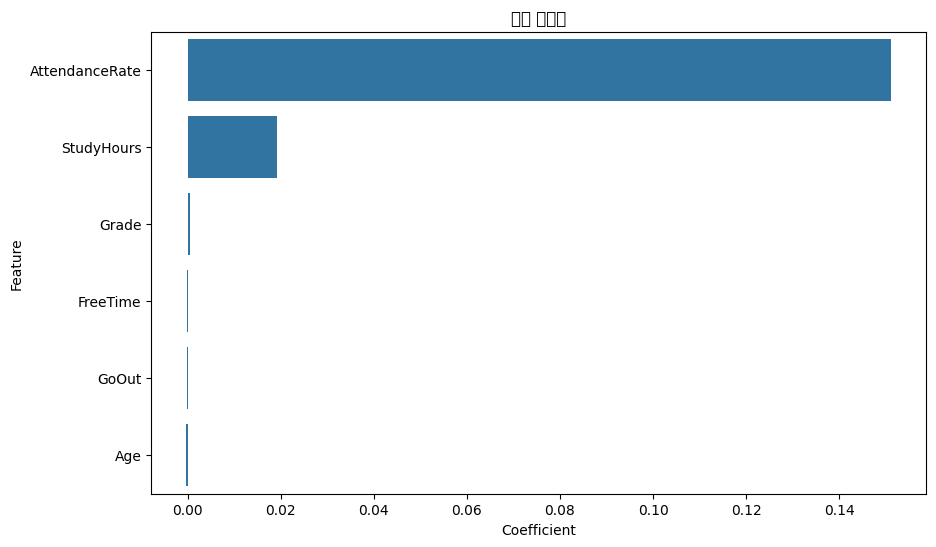

c:\anaconda\anaconda3\envs\math\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\anaconda\anaconda3\envs\math\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\anaconda\anaconda3\envs\math\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\anaconda\anaconda3\envs\math\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\anaconda\anaconda3\envs\math\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53580 (\N{HANGUL SYLLABLE TE}) missing from font(s) DejaVu Sans.

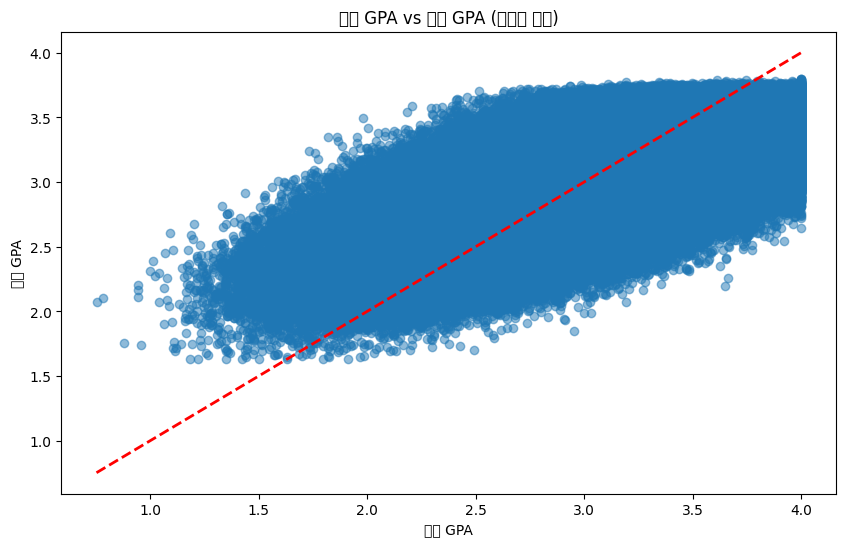

In [ ]:
#선형회귀
train_data_copy=train_data.copy()
validation_data_copy=validation_data.copy()
test_data_copy=test_data.copy()


X_train = train_data[numeric_features]
y_train = train_data[target]

# 검증 데이터 준비
X_val = validation_data[numeric_features]
y_val = validation_data[target]

# 테스트 데이터 준비
X_test = test_data[numeric_features]
y_test = test_data[target]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# 선형회귀 모델 학습
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 예측
y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

# 모델 평가
train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("=== 모델 성능 평가 ===")
print(f"훈련 세트 MSE: {train_mse:.4f}")
print(f"검증 세트 MSE: {val_mse:.4f}")
print(f"테스트 세트 MSE: {test_mse:.4f}")
print(f"\n훈련 세트 R2: {train_r2:.4f}")
print(f"검증 세트 R2: {val_r2:.4f}")
print(f"테스트 세트 R2: {test_r2:.4f}")

# 특성 중요도 시각화
feature_importance = pd.DataFrame({
    'Feature': numeric_features,
    'Coefficient': model.coef_
})
feature_importance = feature_importance.sort_values('Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Coefficient', y='Feature')
plt.title('feature importance')
plt.show()

# 실제값과 예측값 비교 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('GPA')
plt.ylabel('predicted GPA')
plt.title('actual GPA vs predicted GPA (test set)')
plt.show()

In [ ]:
#릿지 라쏘

In [ ]:
#분류류

In [ ]:
# 주성분회귀

In [ ]:
#트리리

In [ ]:
#  부분최소제곱법

In [ ]:
# XGBoost